In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, svm



In [ ]:
# import statsmodels.api as sm
# from statsmodels.nonparametric.kde import KDEUnivariate
# from statsmodels.nonparametric import smoothers_lowess
# from patsy import dmatrices
# from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

In [46]:
#df = pd.read_csv("/Users/avkashchauhan/learn/kaggle/titanic/train.csv") 
df = pd.read_csv("/home/ubuntu/toolkit/titanic/train.csv") 

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [25]:
print(df.Survived.count())
print(df.Survived.sum())

891
342


In [27]:
df.Age[NaN]

NameError: name 'NaN' is not defined

In [29]:
df.shape

(891, 12)

In [39]:
# Each Field information 
print(df.count())
# Note: Age and Cabin have some NULL values

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [53]:
# Dropping Cabin 
df11 = df.drop(['Cabin'], axis = 1)
df10 = df11.drop(['Ticket'], axis = 1)
## df = df.drop(['Cabin', 'Ticket'], axis = 1)

In [54]:
df10.shape

(891, 10)

In [56]:
df10.count()
# Still Age has some NaN values

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

In [57]:
dfx = df10.dropna()

In [58]:
dfx.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Fare           712
Embarked       712
dtype: int64

In [64]:
df = df10

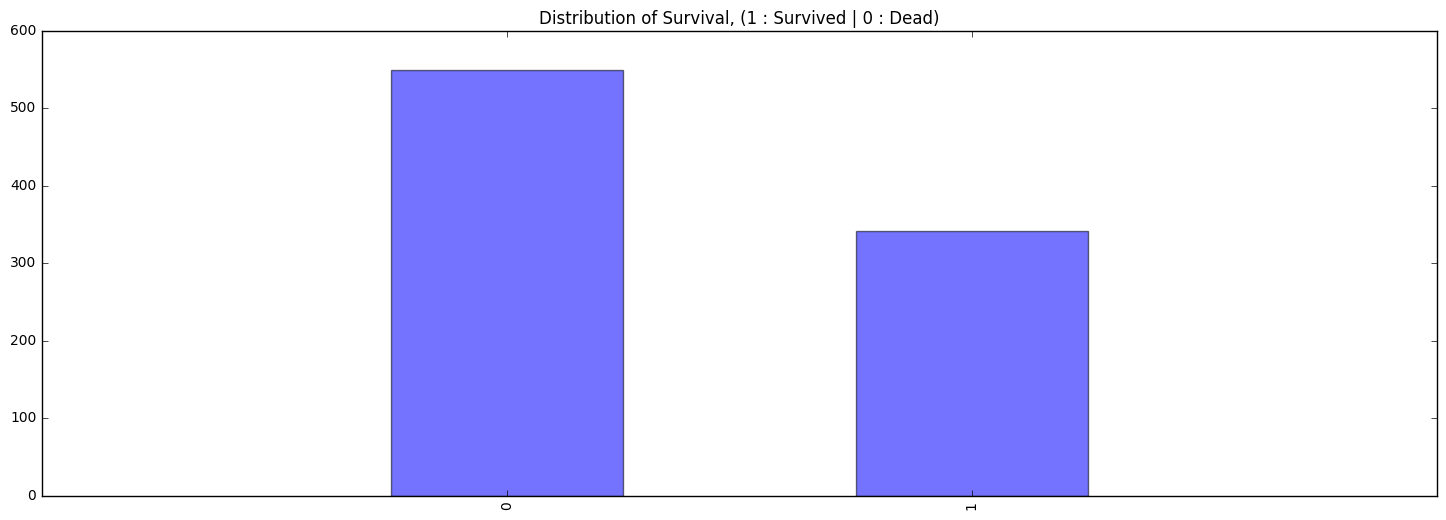

In [92]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((1,1),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 : Survived | 0 : Dead)") 

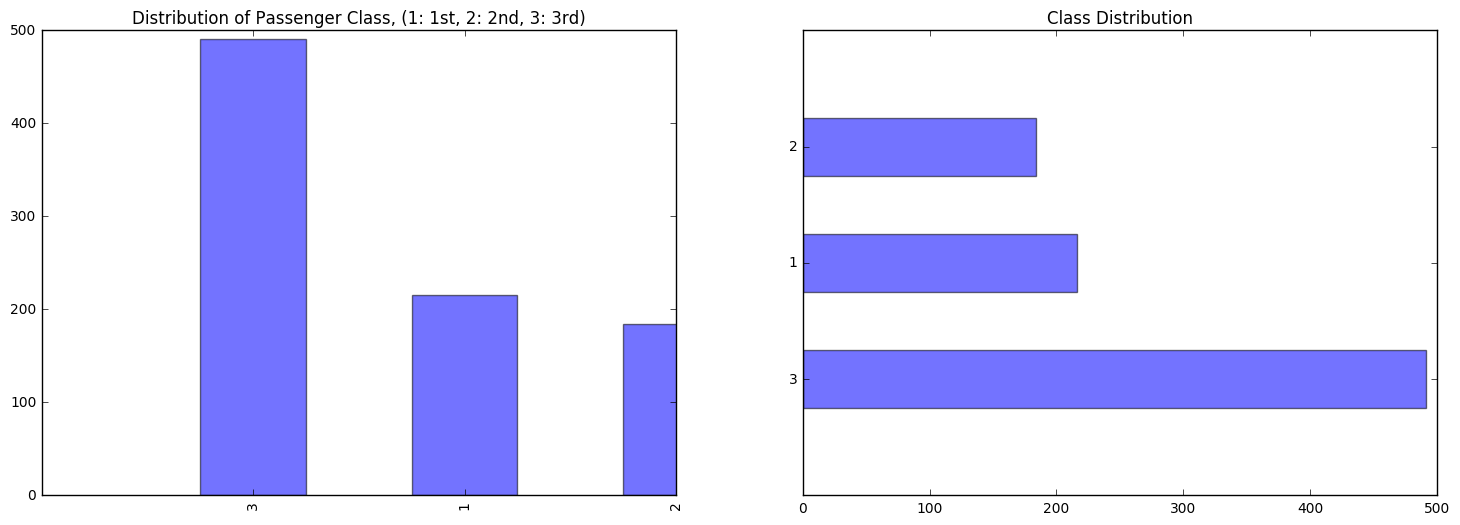

In [91]:
# lets us plot many diffrent shaped graphs together 
fig = plt.figure(figsize=(18,6), dpi=1600) 
ax1 = plt.subplot2grid((1,2),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Pclass.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Passenger Class, (1: 1st, 2: 2nd, 3: 3rd)") 

ax2 = plt.subplot2grid((1,2),(0,1))
df.Pclass.value_counts().plot(kind='barh', alpha=alpha_bar_chart)
ax2.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

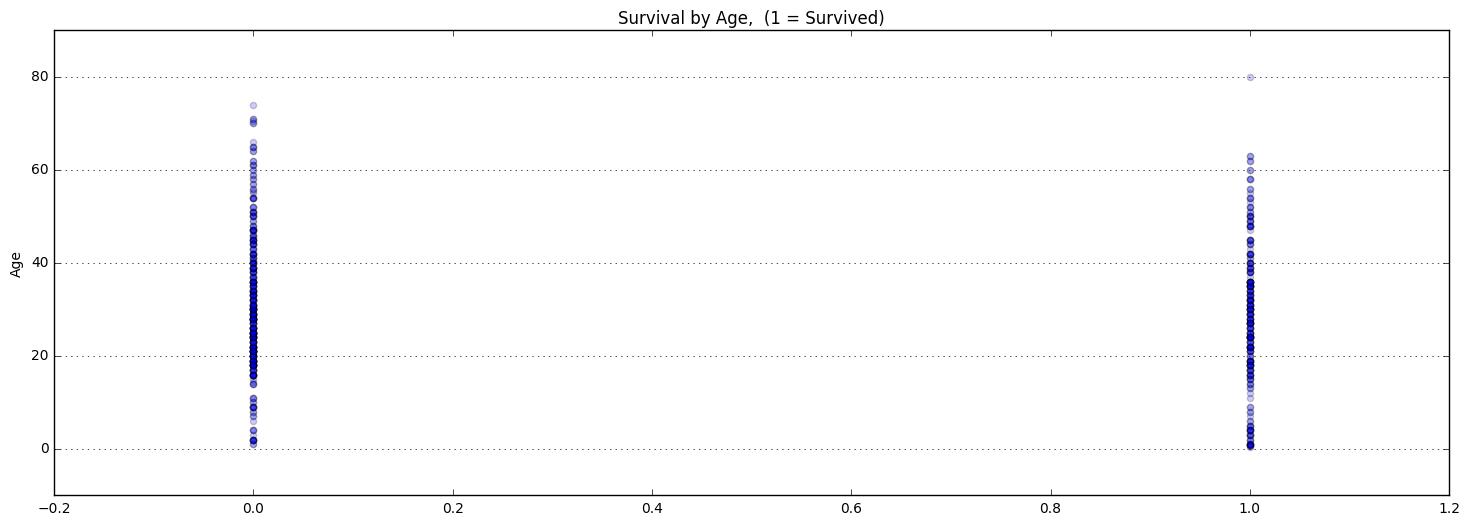

In [87]:
#Survival by Agen
# Use the line below to create full screen-width graph
fig = plt.figure(figsize=(18,6), dpi=1600) 
plt.subplot2grid((1,1),(0,0))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

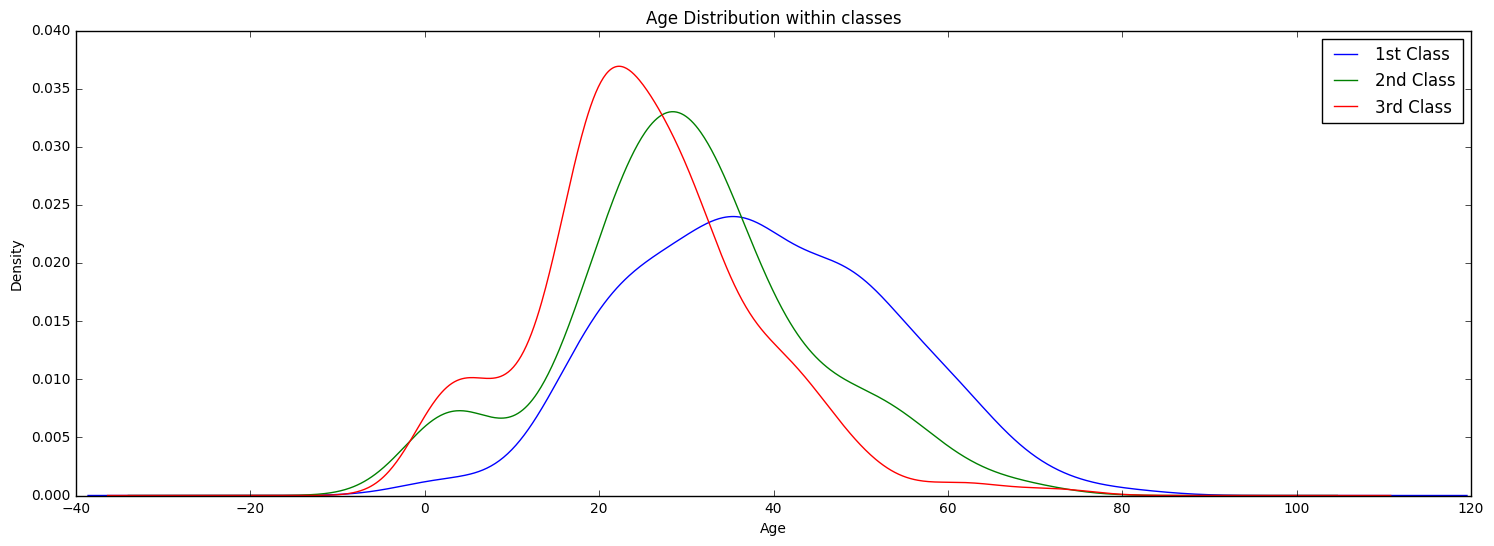

In [88]:
# Age distribution within class
fig = plt.figure(figsize=(18,6), dpi=1600) 
plt.subplot2grid((1,1),(0,0))
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

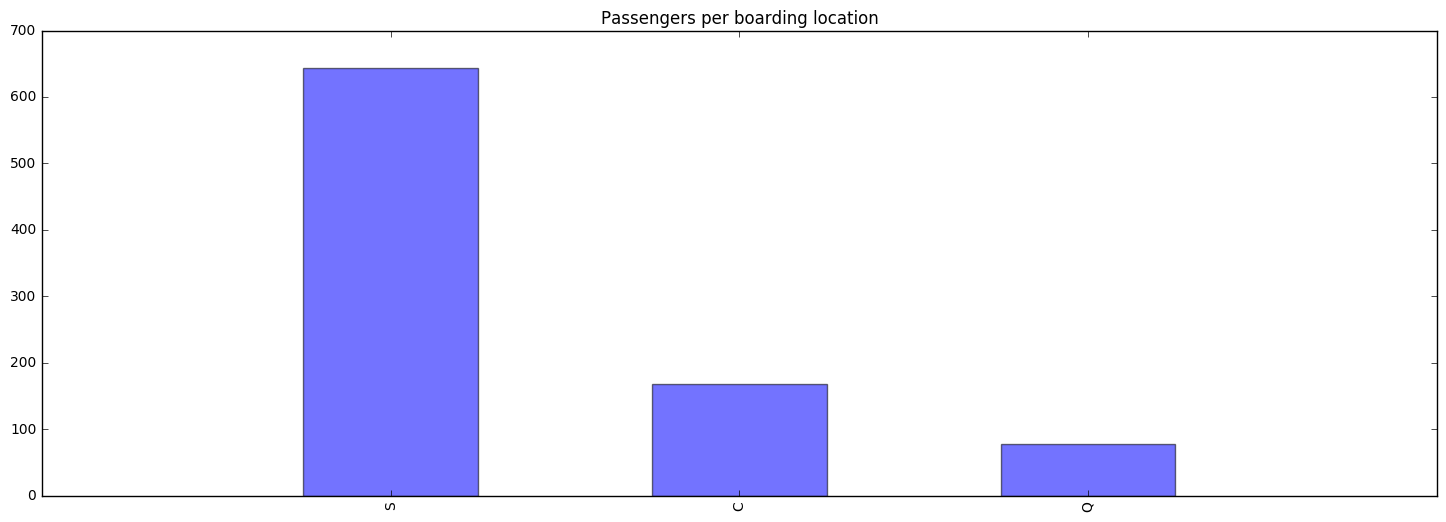

In [90]:
# Passengers per boarding location
fig = plt.figure(figsize=(18,6), dpi=1600) 
ax5 = plt.subplot2grid((1,1),(0,0))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

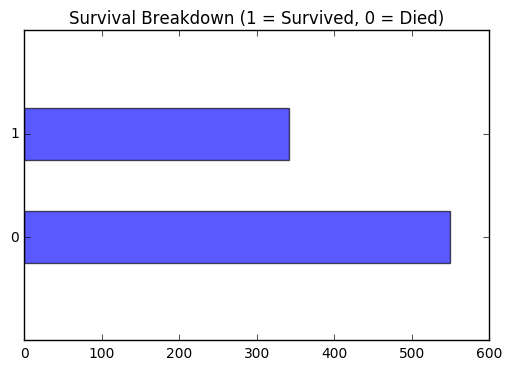

In [96]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
plt.figure(figsize=(18,6))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(-1, 2)

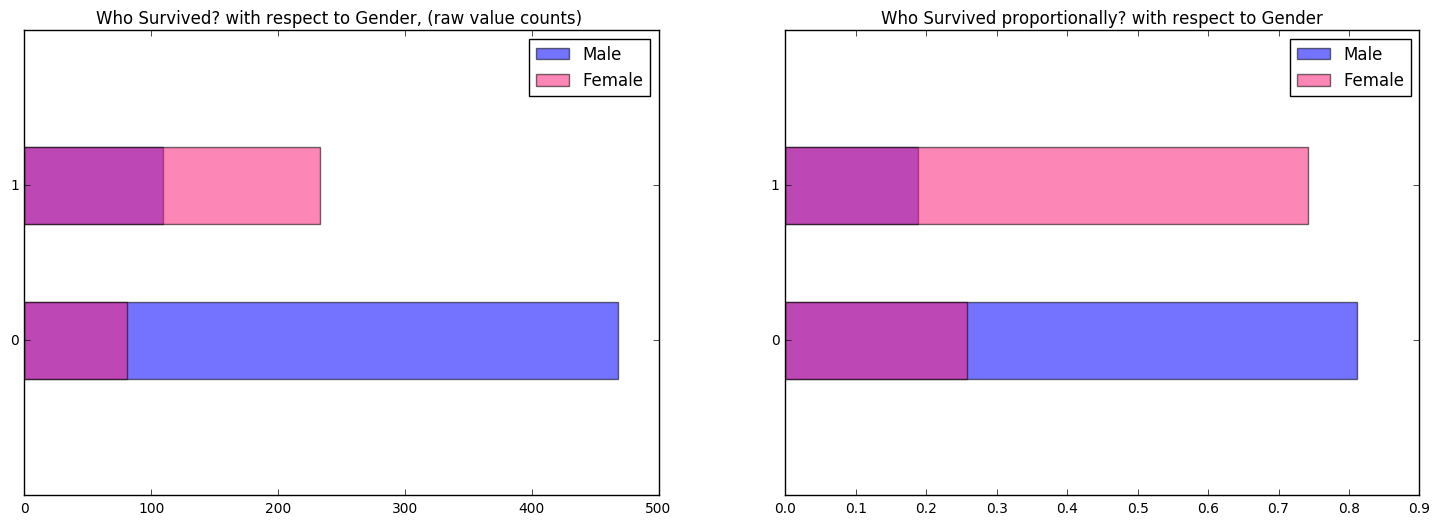

In [97]:
## Distribution of MALE and FEMALE between survivors and dead
## ==========================================================
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

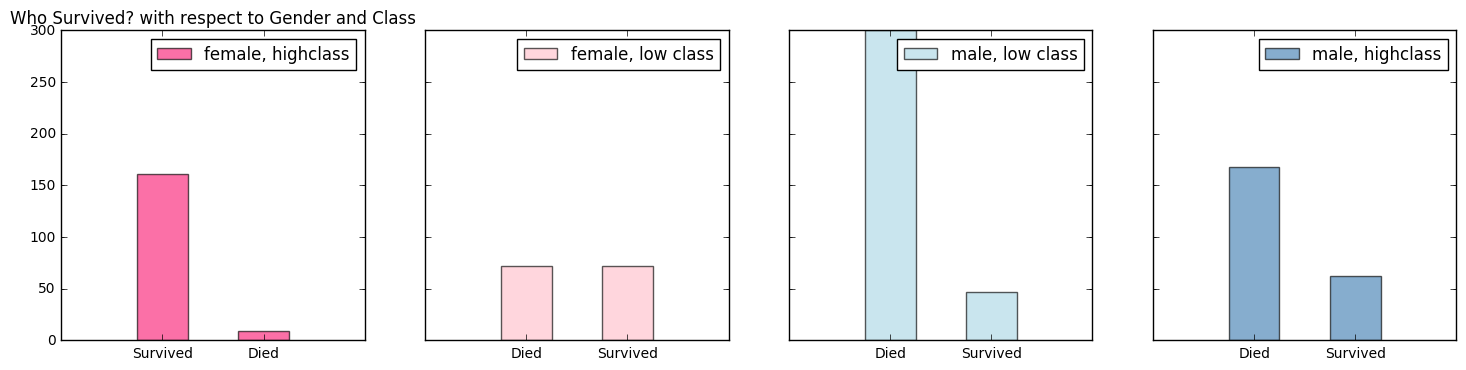

In [98]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

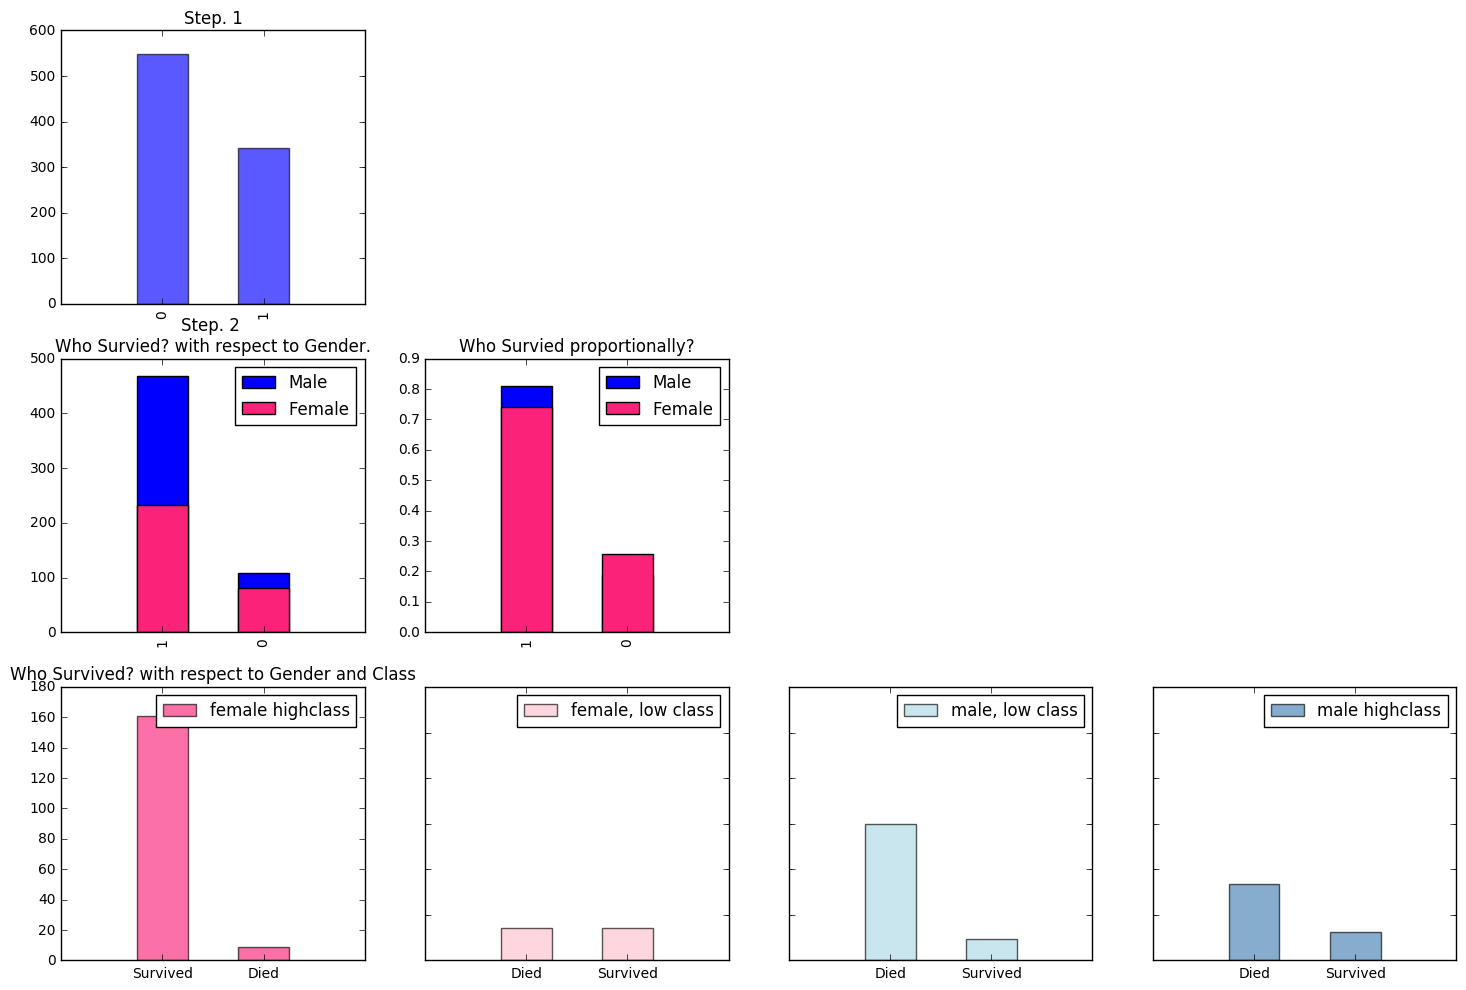

In [99]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')